# Power Outage

**Name(s)**: Luke, Andrew

**Website Link**: (your website link)

# Power Outage Analysis

In this Jupyter Notebook, we will analyze a dataset containing major power outage data in the continental U.S. The dataset covers the period from January 2000 to July 2016.

## Import Statements

### Pandas
Pandas is a powerful data manipulation library. We will use it to load, clean, and analyze the power outage dataset.

### NumPy
NumPy is a library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices. We may use it for numerical computations related to the power outage data.

### OS
The os module provides a way to interact with the operating system. We might use it for handling file paths or checking the existence of files.

### Matplotlib and Seaborn
Matplotlib and Seaborn are popular data visualization libraries. We will use them to create various plots and charts to better understand the patterns and trends in power outages.

### Folium
Folium is a Python library that makes it easy to visualize spatial data and create interactive maps. We will use it to create an interactive map displaying the geographical distribution of power outages.

### Geopy
Geopy provides tools for geocoding (finding the latitude and longitude of an address) and reverse geocoding (finding the address of a set of latitude and longitude coordinates). We may use it in conjunction with Folium for location-based analysis.

### HeatMap (Folium Plugin)
The HeatMap plugin from Folium allows us to create a heatmap layer on our interactive map. It can be used to visualize the intensity or concentration of power outages in different geographical areas.

In [3]:
import pandas as pd
import numpy as np
import os
from scipy.stats import ks_2samp

# Data Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive Map 
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap




# Data Cleaning and Preparation

In this section, we perform several steps to clean and prepare the power outage data for analysis.

In [62]:
# Read the Excel file into a pandas DataFrame
outage = pd.read_excel("outage.xlsx", sheet_name="Masterdata")

# Drop informational rows
outage_cleaned = outage.drop(range(4)).dropna(axis=1, how='all')

# Set column names based on the first row
outage_cleaned.columns = outage_cleaned.iloc[0]

# Drop rows related to units and variables
outage_cleaned = outage_cleaned.drop([4, 5])
outage_cleaned = outage_cleaned.drop(columns="variables")

# Combine 'OUTAGE.START.DATE' and 'OUTAGE.START.TIME' into a new datetime column
outage_cleaned['OUTAGE.START'] = pd.to_datetime(outage_cleaned['OUTAGE.START.DATE']) + pd.to_timedelta(outage_cleaned['OUTAGE.START.TIME'].astype(str))

# Combine 'OUTAGE.RESTORATION.DATE' and 'OUTAGE.RESTORATION.TIME' into a new datetime column
outage_cleaned['OUTAGE.RESTORATION'] = pd.to_datetime(outage_cleaned['OUTAGE.RESTORATION.DATE']) + pd.to_timedelta(outage_cleaned['OUTAGE.RESTORATION.TIME'].astype(str))

# Drop the original date and time columns
outage_cleaned = outage_cleaned.drop(['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'], axis=1)

# Replace "NA" with NaN for missing values
outage_cleaned.replace("NA", np.nan, inplace=True)

# Display the cleaned DataFrame
outage_cleaned.head()

4,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
6,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00
7,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2014-05-11 18:38:00,2014-05-11 18:39:00
8,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00
9,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00
10,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00


# Data Visualization
The provided code utilizes the matplotlib and seaborn libraries to create histograms for four key columns in the power outage dataset: 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', and 'RES.PRICE'. Below are some objectives we are attempting to find by illustrating these graphs. 

## Distribution of OUTAGE.DURATION

Objective:
- Understand the distribution of outage durations to identify common patterns and outliers.

Justification:

- Outage duration is a crucial metric, providing insights into the temporal aspect of power outages.
- A histogram with a kernel density estimate (KDE) allows us to observe the central tendency and spread of outage durations.

## Distribution of DEMAND.LOSS.MW

Objective:
- Analyze the distribution of demand loss in terms of megawatts during power outages.

Justification:

- 'DEMAND.LOSS.MW' represents the amount of demand lost during an outage, offering insights into the severity of power disruptions.
- A histogram with KDE enables visualization of the range and frequency of demand losses.

## Distribution of CUSTOMERS.AFFECTED

Objective:
- Explore the impact of power outages on the number of customers affected.

Justification:
- 'CUSTOMERS.AFFECTED' provides information on the scale of the outage in terms of affected users.
- A histogram with KDE helps understand the distribution of the number of affected customers.

## Distribution of RES.PRICE

Objective:
- Investigate the distribution of residential electricity prices during power outage events.

Justification:
- 'RES.PRICE' represents the residential electricity price, which may correlate with the severity or causes of power outages.
- A histogram with KDE allows us to visualize the distribution of residential electricity prices.

## Summary:
These visualizations serve as essential exploratory tools to gain a deeper understanding of key features in the power outage dataset. By analyzing the distributions of relevant columns, we can identify trends, outliers, and potential relationships between variables, providing a foundation for further analysis and hypothesis formulation.

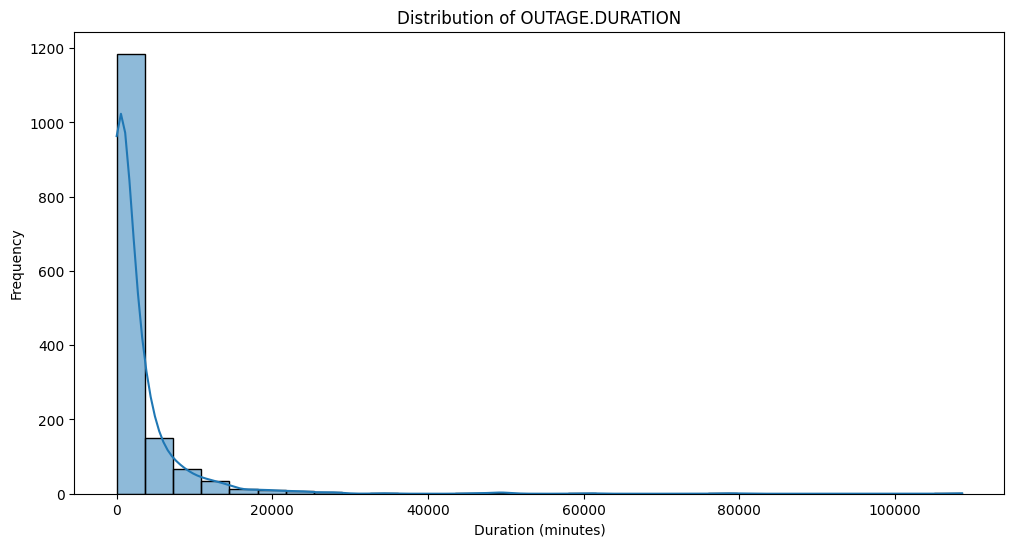

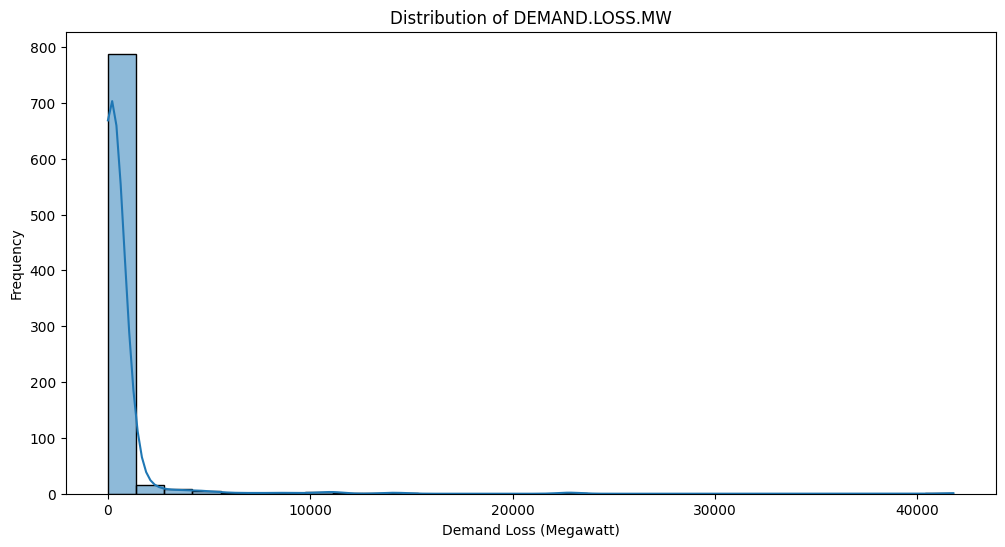

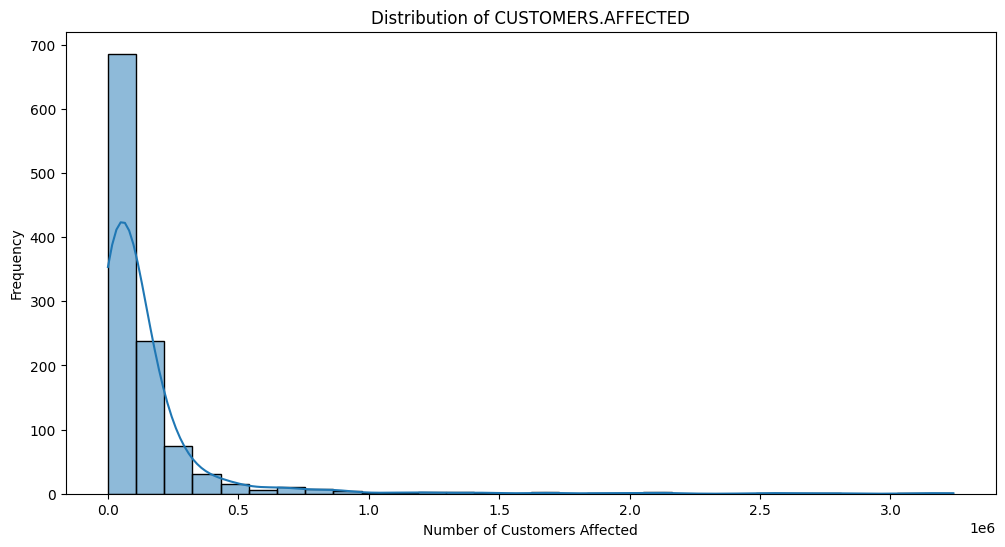

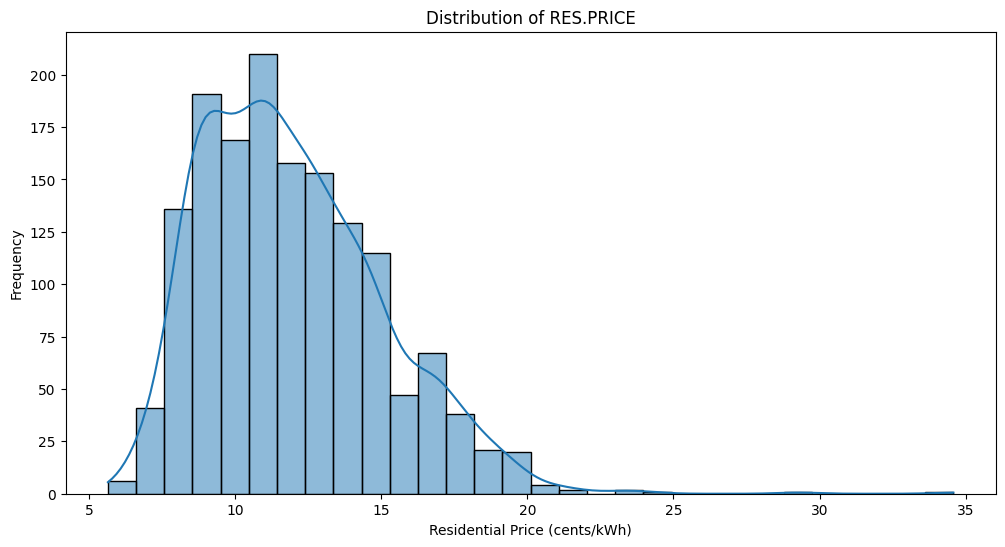

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of OUTAGE.DURATION
plt.figure(figsize=(12, 6))
sns.histplot(outage_cleaned['OUTAGE.DURATION'], bins=30, kde=True)
plt.title('Distribution of OUTAGE.DURATION')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of DEMAND.LOSS.MW
plt.figure(figsize=(12, 6))
sns.histplot(outage_cleaned['DEMAND.LOSS.MW'], bins=30, kde=True)
plt.title('Distribution of DEMAND.LOSS.MW')
plt.xlabel('Demand Loss (Megawatt)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of CUSTOMERS.AFFECTED
plt.figure(figsize=(12, 6))
sns.histplot(outage_cleaned['CUSTOMERS.AFFECTED'], bins=30, kde=True)
plt.title('Distribution of CUSTOMERS.AFFECTED')
plt.xlabel('Number of Customers Affected')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of RES.PRICE
plt.figure(figsize=(12, 6))
sns.histplot(outage_cleaned['RES.PRICE'], bins=30, kde=True)
plt.title('Distribution of RES.PRICE')
plt.xlabel('Residential Price (cents/kWh)')
plt.ylabel('Frequency')
plt.show()

# Exploratory Data Analysis (EDA) Visualizations

## Uncovering Patterns and Comparisons

In this section, we delve into visualizations aimed at uncovering patterns and making insightful comparisons within the power outage dataset. Utilizing scatter plots and box plots, we explore relationships between outage duration and affected customers, as well as variations in customer impact across different NERC regions. These visualizations serve as a foundational step in understanding the nuances and potential factors influencing power outage events.

### Scatter Plot of OUTAGE.DURATION vs. CUSTOMERS.AFFECTED
Description:
This scatter plot is created to visually assess the potential correlation or pattern between the duration of power outages ('OUTAGE.DURATION') and the number of customers affected ('CUSTOMERS.AFFECTED'). Each point on the plot represents a specific power outage event, with the x-axis indicating the duration of the outage in minutes and the y-axis representing the number of affected customers. By examining the distribution of points, one can infer whether longer durations tend to result in a higher number of affected customers or if there are other patterns worth exploring.

### Box Plot of NERC.REGION vs. CUSTOMERS.AFFECTED
Description:
This box plot is designed to compare the distribution of the number of customers affected ('CUSTOMERS.AFFECTED') across different NERC (North American Electric Reliability Corporation) regions. Each box represents the interquartile range (IQR) of the data for a specific region, with the median indicated by the horizontal line inside the box. Outliers are also displayed as individual points. By examining these box plots, one can gain insights into the variations in the impact of power outages on customers across different NERC regions.

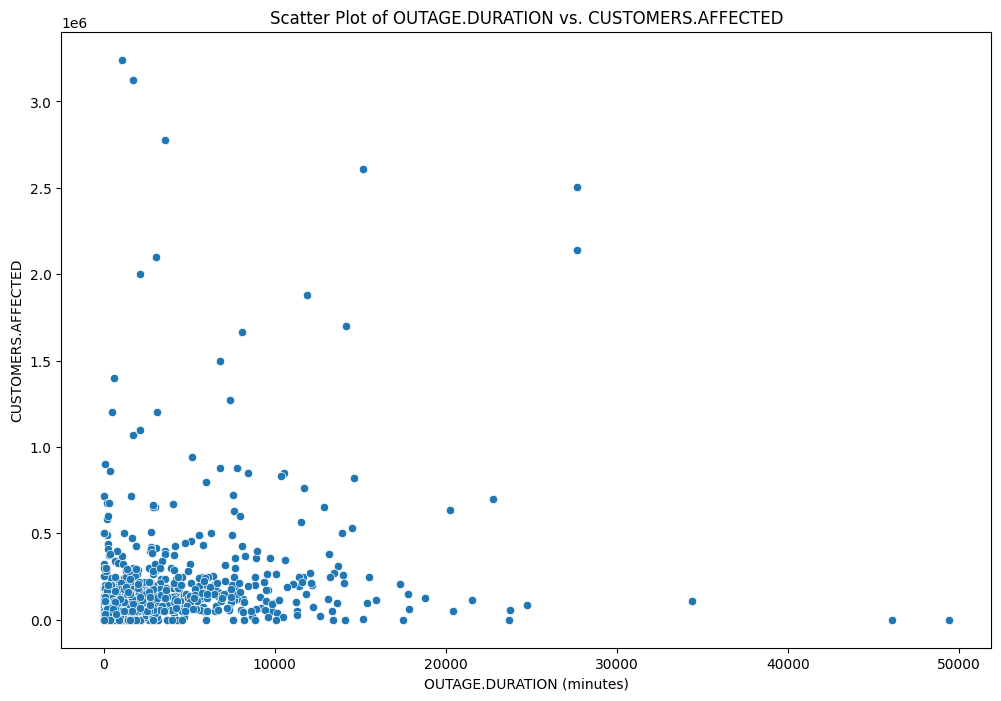

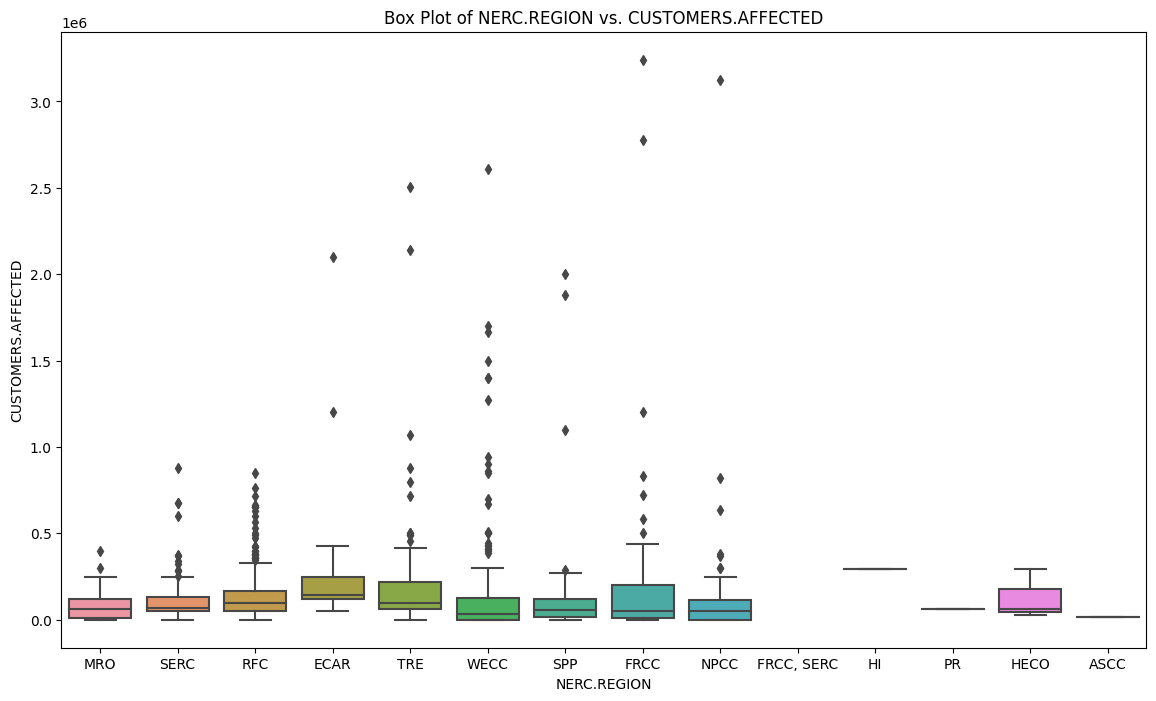

In [65]:
# Scatter plot of OUTAGE.DURATION vs. CUSTOMERS.AFFECTED
plt.figure(figsize=(12, 8))
sns.scatterplot(x='OUTAGE.DURATION', y='CUSTOMERS.AFFECTED', data=outage_cleaned)
plt.title('Scatter Plot of OUTAGE.DURATION vs. CUSTOMERS.AFFECTED')
plt.xlabel('OUTAGE.DURATION (minutes)')
plt.ylabel('CUSTOMERS.AFFECTED')
plt.show()

# Box plot of NERC.REGION vs. CUSTOMERS.AFFECTED
plt.figure(figsize=(14, 8))
sns.boxplot(x='NERC.REGION', y='CUSTOMERS.AFFECTED', data=outage_cleaned)
plt.title('Box Plot of NERC.REGION vs. CUSTOMERS.AFFECTED')
plt.xlabel('NERC.REGION')
plt.ylabel('CUSTOMERS.AFFECTED')
plt.show()

# Customer Impact Analysis

## Aggregating Customer Impact Data (Groupby)
Description:
In this section, the code groupes the data by 'State' and calculates the average number of customers affected ('CUSTOMERS.AFFECTED') for each state. This provides insights into the regional variations in the impact of power outages. The result is displayed in a DataFrame, showcasing the average customer impact for each state.

## Aggregating Customer Impact Data (Pivot Table)
Description:
In this section, the code groupes the data by 'State' and calculates the average number of customers affected ('CUSTOMERS.AFFECTED') for each state. This provides insights into the regional variations in the impact of power outages. The result is displayed in a DataFrame, showcasing the average customer impact for each state.


In [66]:
# Group by 'State' and calculate the average 'CUSTOMERS.AFFECTED' for each year
average_customers_by_state= outage_cleaned.groupby("U.S._STATE")["CUSTOMERS.AFFECTED"].mean()
average_customers_by_state = average_customers_by_state.to_frame().reset_index()

# Display the result
print("Average Customers Affected by State:")
average_customers_by_state

Average Customers Affected by State:


,U.S._STATE,CUSTOMERS.AFFECTED
0,Alabama,94328.800000
1,Alaska,14273.000000
2,Arizona,64402.666667
3,Arkansas,47673.846154
4,California,201365.716535
5,Colorado,41060.636364
6,Connecticut,60339.230769
7,Delaware,3475.000000
8,District of Columbia,194709.222222
9,Florida,289369.090909


In [67]:
# Pivot the data to examine average 'CUSTOMERS.AFFECTED' by 'CLIMATE.REGION' and 'CAUSE.CATEGORY'
pivot_table = outage_cleaned.pivot_table(values='CUSTOMERS.AFFECTED', index='CLIMATE.REGION', columns='CAUSE.CATEGORY', aggfunc='mean')

# Display the pivot table
print("\nAverage Customers Affected by Climate Region and Cause Category:")
pivot_table


Average Customers Affected by Climate Region and Cause Category:


CAUSE.CATEGORY,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
CLIMATE.REGION,,,,,,,
Central,87750.000000,0.0,110.714286,9666.666667,NaN,148706.653226,210450.000000
East North Central,NaN,NaN,660.111111,0.000000,7600.000000,134972.500000,759737.666667
Northeast,28575.750000,0.5,1055.580247,0.000000,18600.000000,169466.934524,530758.857143
Northwest,46651.500000,NaN,92.592593,0.000000,4000.000000,169284.034483,35000.000000
South,62721.666667,NaN,1042.833333,14500.000000,4917.636364,223231.144231,227102.047619
Southeast,145420.200000,NaN,0.000000,NaN,0.000000,206523.448276,75555.533333
Southwest,55666.666667,0.0,327.423077,35230.000000,NaN,85138.428571,135655.571429
West,198608.142857,0.0,14060.000000,5039.192308,NaN,361041.403509,152040.454545
West North Central,NaN,NaN,0.000000,NaN,34500.000000,74178.000000,NaN


# Enhancing Exploration with Folium: Geospatial Analysis
In this section, we aim to enhance the exploration of power outage effects by incorporating interactive geospatial analysis using Folium. The provided code includes a function to retrieve latitude and longitude information for each U.S. state. By applying this function to the 'U.S._STATE' column, the dataset is enriched with geographical coordinates. Rows with missing latitude and longitude information are then removed to ensure accuracy in the geospatial analysis.

Now that the latitude and longitude information is available, we can proceed to create interactive Folium maps to visualize and analyze the effects of power outages by state.

In [68]:
# Initialize the geolocator
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get latitude and longitude
def get_lat_lon(location):
    try:
        location = geolocator.geocode(location)
        return (location.latitude, location.longitude)
    except:
        return None

# Apply the function to the 'U.S._STATE' column
average_customers_by_state['Latitude, Longitude'] = average_customers_by_state['U.S._STATE'].apply(get_lat_lon)

# Split the 'Latitude, Longitude' column into separate 'Latitude' and 'Longitude' columns
average_customers_by_state[['Latitude', 'Longitude']] = pd.DataFrame(average_customers_by_state['Latitude, Longitude'].tolist(), index=average_customers_by_state.index)

# Drop the 'Latitude, Longitude' column
average_customers_by_state = average_customers_by_state.drop('Latitude, Longitude', axis=1)

# Display the resulting DataFrame
average_customers_by_state

,U.S._STATE,CUSTOMERS.AFFECTED,Latitude,Longitude
0,Alabama,94328.800000,33.258882,-86.829534
1,Alaska,14273.000000,64.445961,-149.680909
2,Arizona,64402.666667,34.395342,-111.763275
3,Arkansas,47673.846154,35.204888,-92.447911
4,California,201365.716535,36.701463,-118.755997
5,Colorado,41060.636364,38.725178,-105.607716
6,Connecticut,60339.230769,41.650020,-72.734216
7,Delaware,3475.000000,38.692045,-75.401331
8,District of Columbia,194709.222222,38.893847,-76.988043
9,Florida,289369.090909,27.756767,-81.463983


# Visualizing Customer Impact with Folium Heatmap
This code snippet utilizes Folium to create an interactive heatmap visualizing the impact of power outages based on the number of affected customers. The map is centered on Minnesota, serving as the default location due to the order of the Excel file. The heatmap layer is constructed using latitude, longitude, and the 'CUSTOMERS.AFFECTED' column. Each point on the map contributes to the heatmap intensity, providing a spatial representation of the customer impact. 

In [69]:
# Remove Nan entries
average_customers_by_state = average_customers_by_state[~average_customers_by_state["CUSTOMERS.AFFECTED"].isna()]

# Create a Map instance
m = folium.Map(location=[46.7296, -94.6859], zoom_start=6)  # Location coordinates for Minnesota

# Prepare data for the heatmap
data = average_customers_by_state[['Latitude', 'Longitude', 'CUSTOMERS.AFFECTED']].values.tolist()

# Add the heatmap to the map
HeatMap(data).add_to(m)

# Display the map
m

### Assessment of Missingness

In [49]:
# NMAR Analysis

# We believe the column CAUSE.CATEGORY.DETAIL is likely to be NMAR as the column
# revolves around a detailed description of the event categories, and too complex
# of a description may cause nothing to be marked down instead. Possible data 
# that could help make it MAR would be the uniqueness or complexity of the cause
# since more complex causes may not be easily inputed into the data.


# Missingness Dependency

df = pd.read_csv('outage.csv')

def ks_query(missing, dependent):
    mar = df.copy()
    mar['missing'] = mar[missing].isna()
    res = ks_2samp(mar.query('missing')[dependent], mar.query('not missing')[dependent])
    return res

dur_vs_cust = ks_query('OUTAGE.DURATION', 'CUSTOMERS.AFFECTED')
dur_vs_sales = ks_query('OUTAGE.DURATION', 'TOTAL.SALES')

duration_missing = df.copy()
duration_missing['missing'] = duration_missing['OUTAGE.DURATION'].isna()

px.histogram(duration_missing, x='CUSTOMERS.AFFECTED', color='missing', histnorm='probability', marginal='box',
             title="customers affected by missingness of outage duration", barmode='overlay', opacity=0.7)

# px.histogram(duration_missing, x='TOTAL.SALES', color='missing', histnorm='probability', marginal='box',
#              title="total sales by missingness of outage duration", barmode='overlay', opacity=0.7)

### Hypothesis Testing

In [70]:
# Null Hypothesis
# The duration of outages in the years 2005 comes from the same population as 2015.

# Alternative Hypothesis
# The duration of outages in the year 2015 are shorter than the duration of outages in 2005

# Test Statistic
# Difference in group means

In [ ]:
n_repetitions = 500

shuffled = df[(df['OUTAGE.START'].str.startswith('2005')) | (df['OUTAGE.START'].str.startswith('2015'))].dropna()
shuffled['old_year'] = shuffled['OUTAGE.START'].str.startswith('2005')

observed_difference = shuffled.groupby('old_year')['OUTAGE.DURATION'].mean().diff().iloc[-1]

differences = []
for _ in range(n_repetitions):
    
    with_shuffled = shuffled.assign(Shuffled_Duration=np.random.permutation(shuffled['OUTAGE.DURATION']))

    group_means = (
        with_shuffled
        .groupby('old_year')
        .mean()
        .loc[:, 'Shuffled_Duration']
    )
    difference = group_means.diff().iloc[-1]
    
    differences.append(difference)

(np.array(differences) >= observed_difference).mean()